In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.read_csv('BA-detail.csv',index_col=False)
df.drop(columns=['Unnamed: 0'])

,Sample,Replication,n,m,Hop,Neigbour Index,Original,TDA
0,1,1,573,66,1,1,5736.60,15.86
1,1,1,573,66,1,2,13506.72,27.80
2,1,1,573,66,1,3,21311.47,4.21
3,1,1,573,66,1,4,1555.14,11.65
4,1,1,573,66,1,5,2107.88,31.97
...,...,...,...,...,...,...,...,...
19995,50,5,917,48,4,28,108212.06,9.01
19996,50,5,917,48,4,29,87099.27,5.05
19997,50,5,917,48,4,30,66533.14,18.61
19998,50,5,917,48,4,31,49978.58,6.49


In [75]:
hop = 4
counter = 1
hop_4_original ={}
hop_4_TDA = {}
hood = []
for i in range(-hop,hop + 1):
        for j in range(-hop,hop + 1):
            if (i == -hop or i == hop or j == -hop or j == hop):
                hop_4_original[str(counter)] = []
                hop_4_TDA[str(counter)] = []
                hood.append(str(counter))
                counter += 1

In [77]:
hop_4_TDA

{'1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': [],
 '10': [],
 '11': [],
 '12': [],
 '13': [],
 '14': [],
 '15': [],
 '16': [],
 '17': [],
 '18': [],
 '19': [],
 '20': [],
 '21': [],
 '22': [],
 '23': [],
 '24': [],
 '25': [],
 '26': [],
 '27': [],
 '28': [],
 '29': [],
 '30': [],
 '31': [],
 '32': []}

In [81]:

for index,row in df.iterrows():
    if row["Hop"] == 4:
        neighbour_id = str(int(row["Neigbour Index"]))
        hop_4_original[neighbour_id].append(row["Original"])
        hop_4_TDA[neighbour_id].append(row["TDA"])


In [83]:
mean_original = []
mean_TDA = []
for i in range(32):
    key =  str(i+1)
    mean_original.append(math.log10(statistics.mean(hop_4_original[key])))
    mean_TDA.append(math.log10(statistics.mean(hop_4_TDA[key])))

In [84]:
columns = []
row_list =[]
row_list.append(mean_original)
row_list.append(mean_TDA)
for i in range(32):
    column = "neighbour_" + str(i+1)
    columns.append(column)

df = pd.DataFrame(row_list,columns=columns,index = ["original","TDA"])
df


,neighbour_1,neighbour_2,neighbour_3,neighbour_4,neighbour_5,neighbour_6,neighbour_7,neighbour_8,neighbour_9,neighbour_10,...,neighbour_23,neighbour_24,neighbour_25,neighbour_26,neighbour_27,neighbour_28,neighbour_29,neighbour_30,neighbour_31,neighbour_32
original,4.748289,4.794869,4.851378,4.920205,4.985785,5.057037,5.125645,5.193329,5.255403,4.555330,...,4.591832,5.273929,5.213336,5.146841,5.079946,5.014713,4.951673,4.888920,4.838461,4.800024
TDA,1.245184,1.234292,1.227661,1.268532,1.287702,1.291706,1.276600,1.208848,1.194649,1.239093,...,1.295199,1.439661,1.345122,1.352706,1.385915,1.389114,1.350106,1.296863,1.323471,1.325497


In [71]:
def calc_average_for_hop(n,p,delta_n,delta_p,hop):
    
    for i in range(-hop,hop + 1):
        for j in range(-hop,hop + 1):
            if (i == -hop or i == hop or j == -hop or j == hop):
                print(i*delta_n + n,j*delta_p + p)

In [34]:
calc_average_for_hop(10,0.5,1,0.1,1)

9 0.4
9 0.5
9 0.6
10 0.4
10 0.6
11 0.4
11 0.5
11 0.6


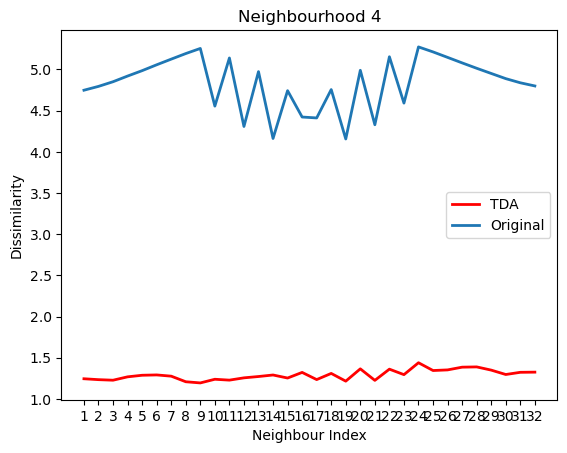

In [86]:

plt.plot(hood, mean_TDA,linewidth=2, markersize=12,color='red',label ="TDA")
plt.plot(hood, mean_original,linewidth=2, markersize=12, label="Original")
plt.xlabel('Neighbour Index')
plt.ylabel('Dissimilarity')
plt.title("Neighbourhood 4")
plt.legend()
plt.show()